In [5]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav

from tqdm import tqdm

In [6]:
vd = readsav("vdama_26965.190820.1115.dat")['vd']

In [7]:
vd.dtype.names

('OBNM',
 'BLAZE',
 'CONTIN',
 'CTS',
 'CONT_OFFSET',
 'EPOCH',
 'GDPIX',
 'JD',
 'NPIX_CHUNK',
 'ORD',
 'PERROR',
 'PIXT',
 'PIXOB',
 'RED_CHI',
 'RMS',
 'SMOD',
 'SOBS',
 'STEL',
 'STMP',
 'STMP_MORPH',
 'TEMPL_WT',
 'TEMPL_NM',
 'UNC',
 'WAV_LAB',
 'WAV',
 'WTEL',
 'WTMP',
 'VEL',
 'WEIGHT')

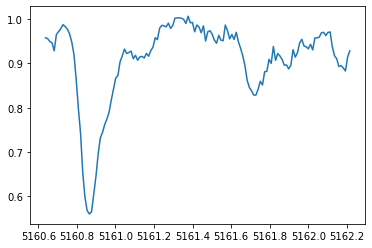

In [8]:
ncnk = 0
plt.plot(vd['wav'][ncnk],vd['sobs'][ncnk])

plt.show()

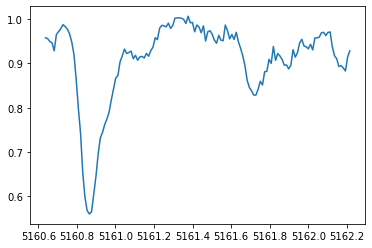

In [9]:
plt.plot(vd.wav[ncnk],vd.sobs[ncnk])

plt.show()

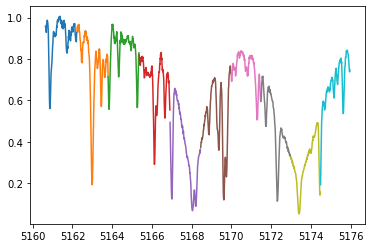

In [10]:
for n in range (0,10):
    plt.plot(vd.wav[n],vd.sobs[n])

In [11]:
print(len(vd.wav))

numchunk = 1386

med_wav = np.zeros(numchunk)

for icnk,ncnk in enumerate(range(0,numchunk)):
    med_wav[icnk] = np.median(vd.wav[ncnk])
    
print(med_wav)

1386
[5161.42790499 5163.01114376 5164.57135084 ... 7155.63094641 7157.20034028
 7158.75722612]


In [12]:
print(len(vd.vel))

1386


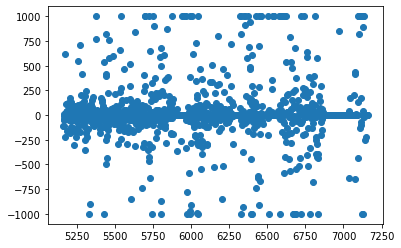

In [13]:
#median wav on x and rv on y (vel)

plt.scatter(med_wav,vd.vel)

plt.show()

#chunks are all behaving differently, so we use this to better understand what the RV really is

In [14]:
vd_files = glob('./26965/vdama_26965.*.dat')

#['vd'] is not needed here because that only applies to indiv files

In [15]:
print(len(vd_files))

187


In [16]:
ls

220630_expres_vd.py                    26965_activityIndicators_pandas.ipynb
220708_activityIndicators_pandas.py    EXPRES Chunk-by-chunk 1st try.ipynb
26965/                                 Jahan_Notebook/
26965_200205.1080.fits                 tmp.png
26965_201127.1110.fits                 vdama_26965.190820.1115.dat
26965_activity.csv


In [17]:
for filenum, filenam in enumerate(vd_files):
    print(filenum,filenam)

0 ./26965/vdama_26965.200205.1080.dat
1 ./26965/vdama_26965.190824.1350.dat
2 ./26965/vdama_26965.200917.1090.dat
3 ./26965/vdama_26965.201001.1131.dat
4 ./26965/vdama_26965.200917.1091.dat
5 ./26965/vdama_26965.191216.1076.dat
6 ./26965/vdama_26965.201010.1147.dat
7 ./26965/vdama_26965.211220.1102.dat
8 ./26965/vdama_26965.201103.1133.dat
9 ./26965/vdama_26965.220117.1098.dat
10 ./26965/vdama_26965.200205.1081.dat
11 ./26965/vdama_26965.200905.1089.dat
12 ./26965/vdama_26965.200927.1110.dat
13 ./26965/vdama_26965.220213.1075.dat
14 ./26965/vdama_26965.200926.1110.dat
15 ./26965/vdama_26965.200205.1083.dat
16 ./26965/vdama_26965.211220.1100.dat
17 ./26965/vdama_26965.191216.1074.dat
18 ./26965/vdama_26965.211111.1072.dat
19 ./26965/vdama_26965.191008.1134.dat
20 ./26965/vdama_26965.201001.1132.dat
21 ./26965/vdama_26965.191101.1120.dat
22 ./26965/vdama_26965.191101.1121.dat
23 ./26965/vdama_26965.201001.1133.dat
24 ./26965/vdama_26965.191008.1135.dat
25 ./26965/vdama_26965.211111.1073.

In [76]:
medwavall = np.zeros((numchunk,len(vd_files)))

velo = np.zeros((numchunk,len(vd_files)))

for filenum, filenam in enumerate(tqdm(vd_files)):
    vd = readsav(filenam)['vd']
    for icnk,ncnk in enumerate(range(0,numchunk)):
        medwavall[icnk,filenum] = np.median(vd.wav[ncnk])
        
        velo[icnk,filenum] = vd.vel[ncnk]

100%|█████████████████████████████████████████| 187/187 [03:10<00:00,  1.02s/it]


In [ ]:
#the first two lines are defining two dimension arrays for the median wave for all files and the RV for all the files
#tqdm just gives a progress bar for when running the code
#the arrays are number of chunks with the number of files
#the first part of the for loop: defines a number alongside the file name
#the 2nd for loop: defines the median wavelength for each chunk for file

In [21]:
for filenum, filenam in enumerate(tqdm(vd_files)):
    vd = readsav(filenam)['vd']
    for icnk,ncnk in enumerate(range(0,numchunk)):
        velo[icnk,filenum] = np.mean(vd.vel[ncnk], dtype=np.float64)

100%|█████████████████████████████████████████| 187/187 [02:51<00:00,  1.09it/s]


In [20]:
for filenum, filenam in enumerate(tqdm(vd_files)):
    vd = readsav(filenam)['vd']
    for icnk,ncnk in enumerate(range(0,numchunk)):
        velo[icnk,filenum] = np.std(vd.vel[ncnk], dtype=np.float64)
        

100%|█████████████████████████████████████████| 187/187 [04:20<00:00,  1.39s/it]


In [18]:
import pandas as pd
from scipy.stats import pearsonr

In [19]:
file_name = './26965_activity.csv'
df = pd.read_csv(file_name)
df.head()

,File,Time [MJD],Epoch,SNR,CBC RV [m/s],CBC RV Err. [m/s],CCF RV [m/s],CCF RV Err. [m/s],S Value,H-alpha Emission,H-alpha Equiv. Width [A],CCF FWHM [m/s],CCF FWHM Err. [m/s],BIS [m/s],V_span [m/s],Bi-Gaussian [m/s],Skew Normal,Date Generated
0,26965_190820.1115.fits,58715.487206,5,201.054719,0.808395,0.453045,-42339.29522,0.26474,0.218595,0.214439,1.560971,6591.483264,27.640611,-71.589982,-61.367083,0.748646,-0.942206,2022-06-14T19:00:33.604
1,26965_190824.1349.fits,58719.469213,5,207.624661,-1.044521,0.379194,-42341.19811,0.25551,0.202251,0.213199,1.561505,6603.370528,27.726042,-67.929450,-58.783606,0.581876,-0.931480,2022-06-14T19:00:36.926
2,26965_190824.1350.fits,58719.471884,5,203.504300,-2.870517,0.421004,-42342.12831,0.26022,0.202251,0.215830,1.547990,6601.249197,27.761682,-69.280474,-59.803878,0.634615,-0.006403,2022-06-14T19:00:39.936
3,26965_190825.1237.fits,58720.497347,5,208.827680,-1.894605,0.420891,-42342.21946,0.26869,NaN,0.215981,1.546532,6607.213779,28.281000,-66.496215,-58.325077,0.457273,0.001268,2022-06-14T19:00:42.910
4,26965_191008.1133.fits,58764.403023,5,214.758003,0.839369,0.341155,-42339.09758,0.26467,NaN,0.212081,1.564194,6603.098832,28.844911,-70.267507,-61.663367,0.722900,-0.948795,2022-06-14T19:00:46.100


In [20]:
df.columns
time = df['Time [MJD]']
velocity = df['CBC RV [m/s]']

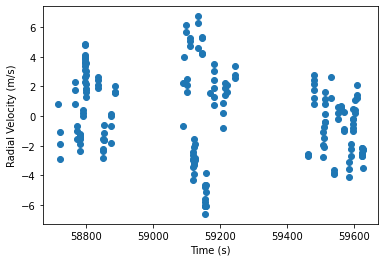

In [21]:
#Q1

plt.scatter(time, velocity)

#plt.title('26965 Activity Indicators')
plt.xlabel('Time (s)')
plt.ylabel('Radial Velocity (m/s)')
plt.show()

In [22]:
actind = df['S Value']

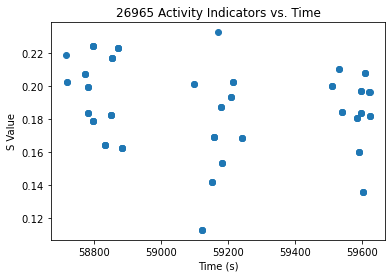

In [23]:
#Q2

plt.scatter(time, actind)

plt.title('26965 Activity Indicators vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('S Value')
plt.show()

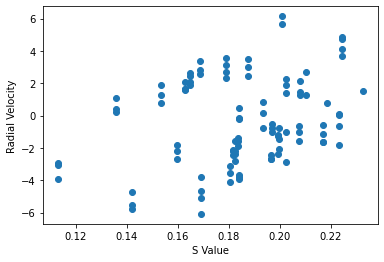

In [24]:
#Q3

plt.scatter(actind, velocity)

plt.xlabel('S Value')
plt.ylabel('Radial Velocity')
plt.show()

In [25]:
nan_mask = np.logical_and(np.isfinite(df['CBC RV [m/s]']),np.isfinite(df['CCF FWHM [m/s]']))
pcc, pcc_pval = pearsonr(df['CBC RV [m/s]'][nan_mask],df['CCF FWHM [m/s]'][nan_mask])
print(pcc)

0.16007366082455365


In [26]:
medwavall = np.zeros((numchunk,len(vd_files)))

velo = np.zeros((numchunk,len(vd_files)))

pccall = np.zeros(numchunk)

for filenum, filenam in enumerate(tqdm(vd_files)):
    vd = readsav(filenam)['vd']
    for icnk,ncnk in enumerate(range(0,numchunk)):
        medwavall[icnk,filenum] = np.median(vd.wav[ncnk])
        
        velo[icnk,filenum] = vd.vel[ncnk]

for icnk,ncnk in enumerate(tqdm(range(0,numchunk))):
    nan_mask = np.logical_and(np.isfinite(velo[ncnk]),np.isfinite(df['CCF FWHM [m/s]']))
    pcc, pcc_pval = pearsonr(velo[ncnk][nan_mask],df['CCF FWHM [m/s]'][nan_mask])
    pccall[ncnk] = pcc

  0%|                                                  | 0/1386 [00:00<?, ?it/s]/Users/jahan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
100%|█████████████████████████████████████| 1386/1386 [00:00<00:00, 2127.36it/s]


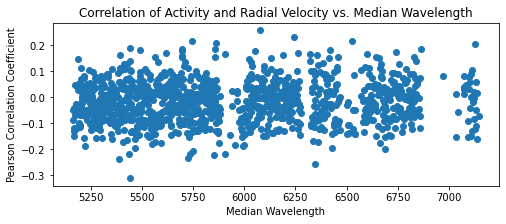

In [34]:
plt.figure(figsize=(8,3))
plt.scatter(medwavall[:,0],pccall)

plt.title('Correlation of Activity and Radial Velocity vs. Median Wavelength')
plt.xlabel('Median Wavelength')
plt.ylabel('Pearson Correlation Coefficient')
plt.show()